# Traffic light state detection

In this notebook, we create a dataset of traffic light and train a classifier to identify the state of the traffic light.


## Extraction


In [2]:
import sys
sys.path.append('./ros/src/tl_detector')

%run ./ros/src/tl_detector/yolo3/utils.py
%run ./ros/src/tl_detector/yolo3/model.py
%run ./ros/src/tl_detector/yolo3/yolo.py

model_path = './model/yolo_v3_coco/yolo.h5'
anchors_path = './model/yolo_v3_coco/yolo_anchors.txt'
classes_path = './model/yolo_v3_coco/coco_classes.txt' 
yolo= YOLO(model_path=model_path, anchors_path=anchors_path, classes_path=classes_path)

Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [16]:
from glob import glob
import shutil
import scipy.misc
from skimage.io import imsave

traffic_light_dataset_path='./run/traffic_light_ds/simulator'
simulator_image_path = './training_data/simulator_traffic_lights/image_color'

output_dir = traffic_light_dataset_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

cnt = 0
for image_file in glob(os.path.join(simulator_image_path,'*.png')):
    image = Image.open(image_file)
    image_data = np.asarray(image)
    out_boxes, out_scores, out_classes = yolo.detect_image(image)
    
    for i, c in reversed(list(enumerate(out_classes))):
        #predicted_class = self.class_names[c]
        box = out_boxes[i]
        score = out_scores[i]

        if(c == 9):
            top, left, bottom, right = box
            top = max(0, np.floor(top + 0.5).astype('int32'))
            left = max(0, np.floor(left + 0.5).astype('int32'))
            bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
            right = min(image.size[0], np.floor(right + 0.5).astype('int32'))
            corp_traffic_light = image_data[top:bottom, left:right, :]
            imsave(os.path.join(traffic_light_dataset_path, str(cnt)+'.png'), corp_traffic_light)
            cnt = cnt+1

Found 0 boxes for img
Found 0 boxes for img
Found 3 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 3 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 4 boxes for img
Found 3 boxes for img
Found 0 boxes for img
Found 1 boxes for img
Found 0 boxes for img
Found 1 boxes for img
Found 1 boxes for img
Found 0 boxes for img
Found 4 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 2 boxes for img
Found 0 boxes for img
Found 2 boxes for img
Found 0 boxes for img
Found 3 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 3 boxes for img
Found 2 boxes for img
Found 6 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 3 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 3 boxes for img
Found 3 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 bo

Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 3 boxes for img
Found 4 boxes for img
Found 0 boxes for img
Found 3 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 2 boxes for img
Found 1 boxes for img
Found 2 boxes for img
Found 3 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 1 boxes for img
Found 3 boxes for img
Found 0 boxes for img
Found 3 boxes for img
Found 3 boxes for img
Found 0 boxes for img
Found 1 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 2 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 4 boxes for img
Found 1 boxes for img
Found 6 boxes for img
Found 2 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 1 boxes for img
Found 4 boxes for img
Found 0 boxes for img
Found 1 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 bo

In [29]:
import sys
sys.path.append('./model/zoo_script/')

%run ./model/zoo_script/lib/string_int_label_map_pb2.py
%run ./model/zoo_script/lib/label_map_util.py
%run ./model/zoo_script/models/object_detection.py

model_name = "./model/ssd_inception_v2_coco_udacity_dropout_training_bag_tf13"

net = Net(graph_fp='%s/frozen_inference_graph.pb' % model_name,
                           labels_fp='./model/zoo_script/data/label.pbtxt',
                           num_classes=90,
                           threshold=0.4)

In [31]:
traffic_light_dataset_path='./run/traffic_light_ds/real'
real_image_path = './training_data/traffic_light_bag_file/image_color'

output_dir = traffic_light_dataset_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

cnt = 1
for image_file in glob(os.path.join(real_image_path,'*.png')):
    image = Image.open(image_file)
    image_data = np.asarray(image)
    filtered_results = net.predict3(np.asarray(image))
    for result in filtered_results:
        top, left, bottom, right = result["bb_o"]
        corp_traffic_light = image_data[top:bottom, left:right, :]
        imsave(os.path.join(traffic_light_dataset_path, str(cnt)+'.png'), corp_traffic_light)
        cnt = cnt+1

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9259059
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9438086
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.99225146
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.89799255
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9874281
[INFO] Read the image ..
[I

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.40877637
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.97696805
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.86665833
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.7177004
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image

[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.53009325
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9784693
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.967805
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.5177589
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 8

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.935382
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.6507981
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9846038
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 80

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.5709629
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.80872875
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.96287274
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.93821925
[INFO] Read the image ..
[INFO] Shape of this image

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.86093545
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.88732827
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.84164375
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9238593
[INFO] Read the image ..
[INFO] Shape of this image

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9837518
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9818425
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9649616
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 8

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.911208
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.82774943
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9754871
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 8

[INFO] Filtering results ...
[INFO] person: 0.62391746
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.87164783
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.91958845
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.72583216
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9623252
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9572164
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9525257
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting obje

[INFO] Filtering results ...
[INFO] person: 0.93010855
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.40821165
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9030886
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.8130375
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image .

[INFO] Filtering results ...
[INFO] person: 0.91165656
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.90172046
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.46315563
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.5169294
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9215879
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.81143975
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...


[INFO] Filtering results ...
[INFO] person: 0.92308336
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.7351221
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9667537
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.841992
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.91333896
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.75073177
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[I

[INFO] Filtering results ...
[INFO] person: 0.6146701
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.8897378
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.971272
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.92862535
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.72546715
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.93197125
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.96956146
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9287453
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.95762
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.4206728
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.92680067
[IN

[INFO] Filtering results ...
[INFO] person: 0.7750958
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9184904
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.90486526
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.87283987
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.93961066
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results .

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.91438335
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9241897
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9800525
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.833295
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.7634374
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9867988
[INF

[INFO] Filtering results ...
[INFO] person: 0.95672274
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.98769116
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.99109405
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9911663
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.992482
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ..

[INFO] Filtering results ...
[INFO] person: 0.7751385
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.62129366
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.97818863
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.90791637
[INFO] Read the image 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.551127
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.6132614
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.976259
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.59367603
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is 

[INFO] Filtering results ...
[INFO] person: 0.5833123
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9700594
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.6545979
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.98545766
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.5869545
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.59416157
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9805495
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.99192303
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9912976
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9386753
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9442298
[I

[INFO] Filtering results ...
[INFO] person: 0.90541536
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.8309371
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9388323
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9956552
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.4476435

[INFO] Filtering results ...
[INFO] person: 0.9153373
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.96988285
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.99225825
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.46737045
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.7372364
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results .

[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.75953716
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.6554725
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.983163
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.92750794
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.7890571
[INFO] Read the image ..
[INFO] Shape of this image i

[INFO] Filtering results ...
[INFO] person: 0.43919608
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.93767744
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.7880344
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.8908273
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image .

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.98728186
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.72291064
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.836447
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9024555
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.7630013
[INFO] Read the image ..
[IN

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.81332594
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9707319
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9677008
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.91675156
[INFO] Read the image ..
[INFO] Shape of this image 

[INFO] Filtering results ...
[INFO] person: 0.90605754
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9562943
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.92858064
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9713651
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.8964479
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ..

[INFO] Filtering results ...
[INFO] person: 0.9365581
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.7050471
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9928197
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.8735026
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.8707064


[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.91673476
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9750415
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.50243556
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width:

[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.8048211
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9891922
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.91615313
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this ima

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.93441606
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.85103726
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.56518906
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.96457434
[INFO] Read the image ..
[INFO] Shape of this imag

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.939718
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.6153054
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9498254
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 80

[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.88511467
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.5199585
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.70596355
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.79321563
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.97883

[INFO] person: 0.46402588
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9753389
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9296423
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9161025
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.43525857
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[I

[INFO] Filtering results ...
[INFO] person: 0.97468275
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.5534155
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.8016956
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.8563147
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.88901925
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ..

[INFO] Filtering results ...
[INFO] person: 0.9096441
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.9172332
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.82405394
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.8861078
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.92160547
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ..

## Dataset creation

## Creating classifiers

## Hassan classifier

In [5]:
def detect_traffic_light_state(image):
    def simple_thresh(img,thresh=(0, 255)):
       #apply only thresholding on image plane and return binary image
        binary = np.zeros_like(img)
        binary[(img > thresh[0]) & (img <= thresh[1])] = 1
        return binary

    rows = image.shape[0]

    #thresholding on red channel
    red_channel = image[:,:,0]
    r_binary = simple_thresh(red_channel,(140, 255))


    #thresholding on green channel
    green_channel = image[:,:,1]
    g_binary = simple_thresh(green_channel,(140, 255))

    #patitioning on r_binary
    r_binary_1 = r_binary[0:int(rows/3)-1,:]
    r_binary_2 = r_binary[int(rows/3):(2*int(rows/3))-1,:]
    r_binary_3 = r_binary[(2*int(rows/3)):rows-1,:]

    #patitioning on g_binary
    g_binary_1 = g_binary[0:int(rows/3)-1,:]
    g_binary_2 = g_binary[int(rows/3):(2*int(rows/3))-1,:]
    g_binary_3 = g_binary[(2*int(rows/3)):rows-1,:]

    #region sum
    r_binary_1_sum = r_binary_1.sum()
    r_binary_2_sum = r_binary_2.sum()
    r_binary_3_sum = r_binary_3.sum()

    #region sum
    g_binary_1_sum = g_binary_1.sum()
    g_binary_2_sum = g_binary_2.sum()
    g_binary_3_sum = g_binary_3.sum()
    
    #print('d', r_binary_1_sum, r_binary_2_sum, r_binary_3_sum, g_binary_1_sum, g_binary_2_sum, g_binary_3_sum)

    if r_binary_1_sum > 2*r_binary_2_sum and r_binary_1_sum > 2*r_binary_3_sum:
        return 0 #TrafficLight.RED
    elif g_binary_3_sum > 2*g_binary_2_sum and g_binary_3_sum > 2*g_binary_1_sum:
        return 2 #TrafficLight.GREEN
    else:
        return 3 # TrafficLight.UNKNOWN

## sezginalpcondition classifier

In [18]:
# RED filter R: 196-255

# YELLOW filter G: 146-255 B: 143-255

# GREEN filter G: 183-255
def detect_traffic_light_state2(image):
    def simple_thresh(img,thresh=(0, 255)):
       #apply only thresholding on image plane and return binary image
        binary = np.zeros_like(img)
        binary[(img > thresh[0]) & (img <= thresh[1])] = 1
        return binary

    rows = image.shape[0]

    #thresholding on red channel
    red_channel = image[:,:,0]

    #thresholding on green channel
    green_channel = image[:,:,1]
    
    blue_channel = image[:,:,2]
    
    #patitioning on r_binary
    r_binary = simple_thresh(red_channel,(196, 255))
    #plt.figure()
    #plt.imshow(r_binary)
    r_binary_1 = r_binary[0:int(rows/3)-1,:]
    r_binary_2 = r_binary[int(rows/3):(2*int(rows/3))-1,:]
    r_binary_3 = r_binary[(2*int(rows/3)):rows-1,:]
    is_red = (r_binary_1.sum() > 2*(r_binary_2.sum())) & (r_binary_1.sum() > 2*(r_binary_3.sum()))

    #(GREEN) patitioning on g_binary
    g_binary = simple_thresh(green_channel,(183, 255))
    #plt.figure()
    #plt.imshow(g_binary)
    g_binary_1 = g_binary[0:int(rows/3)-1,:]
    g_binary_2 = g_binary[int(rows/3):(2*int(rows/3))-1,:]
    g_binary_3 = g_binary[(2*int(rows/3)):rows-1,:]
    
    is_green = (g_binary_3.sum() > 2*(g_binary_2.sum())) & (g_binary_3.sum() > 2*(g_binary_1.sum()))
    
    #(YELLOW) partition on g_binary and b_binary
    g_binary = simple_thresh(green_channel,(146, 255))
    b_binary = simple_thresh(blue_channel,(143, 255))
    combine = g_binary + b_binary
    
    y_binary_1 = combine[0:int(rows/3)-1,:]
    y_binary_2 = combine[int(rows/3):(2*int(rows/3))-1,:]
    y_binary_3 = combine[(2*int(rows/3)):rows-1,:]
    
    is_yellow = (y_binary_2.sum() > 2*(y_binary_1.sum())) & (y_binary_2.sum() > 2*(y_binary_3.sum()))
    
    if is_red:
        return 0 #TrafficLight.RED
    elif is_yellow:
        return 1 #TrafficLight.YELLOW
    elif is_green:
        return 2 #TrafficLight.GREEN
    else:
        return 3 #TrafficLight.UNKNOWN

## LUV classifier

In [167]:
def detect_traffic_light_state3(image):
    img_h, img_w, img_ch = image.shape
    l_channel = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:, :, 2]

    top_third_marker = int(img_h / 3)
    bottom_third_marker = img_h - top_third_marker

    # Magnitude of L is established for each section of the image
    top = 0
    mid = 0
    bottom = 0

    count_result = {'RED': 0 , 'YELLOW': 0, 'GREEN': 0}

    for i in range(top_third_marker):
        for j in range(img_w):
            top += l_channel[i][j] 
    count_result['RED'] = top  # compensate for R, G, B => L, U, V

    for i in range(top_third_marker, bottom_third_marker):
        for j in range(img_w):
            mid += l_channel[i][j]
    count_result['YELLOW'] = mid

    for i in range(bottom_third_marker, img_h):
        for j in range(img_w):
            bottom += l_channel[i][j]
    count_result['GREEN'] = bottom

    #The result is classified into one of the 3 colors and returned
    max_count = max(count_result, key=count_result.get)
    std =np.std(list(count_result.values()))
    mean  = np.mean(list(count_result.values()))
    #print('x', std, std/mean)

    if(std/mean < 0.1):
        return 3
    if max_count == 'RED':
        return 0 #TrafficLight.RED
    elif max_count == 'YELLOW':
        return 1 #TrafficLight.YELLOW
    elif max_count == 'GREEN':
        return 2 #TrafficLight.GREEN 
    else:
        return 3 #TrafficLight.UNKNOWN

## Testing classifiers

In [8]:
real_red_image = './run/traffic_light_ds/real_sort/RED'
real_yellow_image = './run/traffic_light_ds/real_sort/YELLOW'
real_green_image = './run/traffic_light_ds/real_sort/GREEN'
real_unknown_image = './run/traffic_light_ds/real_sort/UNKNOWN'

sim_red_image = './run/traffic_light_ds/simulator_sort/RED'
sim_yellow_image = './run/traffic_light_ds/simulator_sort/YELLOW'
sim_green_image = './run/traffic_light_ds/simulator_sort/GREEN'
sim_unknown_image = './run/traffic_light_ds/simulator_sort/UNKNOWN'

In [42]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


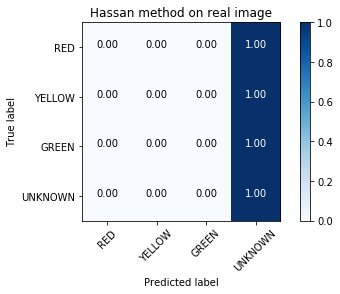

In [139]:
import numpy as np
from glob import glob
import os
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

conf_matrix = np.zeros((4,4))
debug=False
for img_fp in glob(os.path.join(real_red_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    #if not debug:
    #    plt.imshow(img)
    #    debug=True
    detected_state = int(detect_traffic_light_state(img))
    conf_matrix[0][detected_state] = conf_matrix[0][detected_state]+1

for img_fp in glob(os.path.join(real_yellow_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state(img))
    conf_matrix[1][detected_state] = conf_matrix[1][detected_state]+1

for img_fp in glob(os.path.join(real_green_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state(img))
    conf_matrix[2][detected_state] = conf_matrix[2][detected_state]+1

for img_fp in glob(os.path.join(real_unknown_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state(img))
    conf_matrix[3][detected_state] = conf_matrix[3][detected_state]+1
    
#print(conf_matrix)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=["RED", "YELLOW", "GREEN", "UNKNOWN"], normalize=True,
                      title='Hassan method on real image')

Normalized confusion matrix
[[0.61016949 0.         0.08474576 0.30508475]
 [0.         0.         0.         1.        ]
 [0.01136364 0.         0.80681818 0.18181818]
 [0.15217391 0.         0.05434783 0.79347826]]


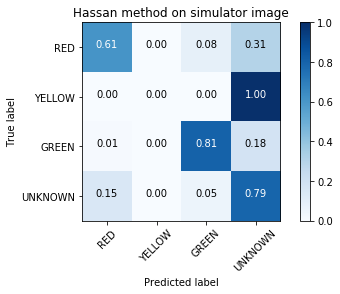

In [140]:
import numpy as np
from glob import glob
import os
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

conf_matrix = np.zeros((4,4))
debug=False
for img_fp in glob(os.path.join(sim_red_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    #if not debug:
    #    plt.imshow(img)
    #    debug=True
    detected_state = int(detect_traffic_light_state(img))
    #if not (detected_state == 0):
    #    plt.figure()
    #    plt.imshow(img)
    #    print('error: ', detected_state)
    
    conf_matrix[0][detected_state] = conf_matrix[0][detected_state]+1

for img_fp in glob(os.path.join(sim_yellow_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state(img))
    conf_matrix[1][detected_state] = conf_matrix[1][detected_state]+1

for img_fp in glob(os.path.join(sim_green_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state(img))
    conf_matrix[2][detected_state] = conf_matrix[2][detected_state]+1

for img_fp in glob(os.path.join(sim_unknown_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state(img))
    conf_matrix[3][detected_state] = conf_matrix[3][detected_state]+1
    
#print(conf_matrix)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=["RED", "YELLOW", "GREEN", "UNKNOWN"], normalize=True,
                      title='Hassan method on simulator image')

Normalized confusion matrix
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


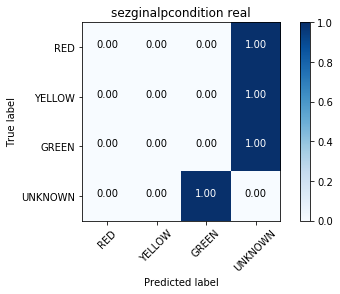

In [50]:
import numpy as np
from glob import glob
import os
import cv2

conf_matrix = np.zeros((4,4))

for img_fp in glob(os.path.join(real_red_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state2(img))
    conf_matrix[0][detected_state] = conf_matrix[0][detected_state]+1

for img_fp in glob(os.path.join(real_yellow_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state2(img))
    conf_matrix[1][detected_state] = conf_matrix[1][detected_state]+1

for img_fp in glob(os.path.join(real_green_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state2(img))
    conf_matrix[2][detected_state] = conf_matrix[2][detected_state]+1

for img_fp in glob(os.path.join(real_unknown_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state2(img))
    conf_matrix[3][detected_state] = conf_matrix[3][detected_state]+1
    
#print(conf_matrix)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=["RED", "YELLOW", "GREEN", "UNKNOWN"], normalize=True,
                      title='sezginalpcondition real')

Normalized confusion matrix
[[0.96610169 0.         0.         0.03389831]
 [0.         0.         0.         1.        ]
 [0.02272727 0.02272727 0.95454545 0.        ]
 [0.06521739 0.01086957 0.32608696 0.59782609]]


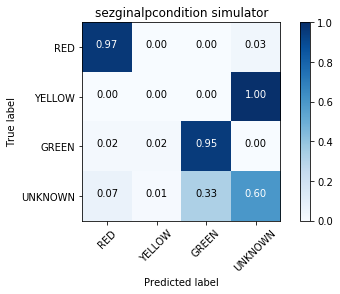

In [51]:
import numpy as np
from glob import glob
import os
import cv2

conf_matrix = np.zeros((4,4))

for img_fp in glob(os.path.join(sim_red_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state2(img))
    conf_matrix[0][detected_state] = conf_matrix[0][detected_state]+1

for img_fp in glob(os.path.join(sim_yellow_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state2(img))
    conf_matrix[1][detected_state] = conf_matrix[1][detected_state]+1

for img_fp in glob(os.path.join(sim_green_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state2(img))
    conf_matrix[2][detected_state] = conf_matrix[2][detected_state]+1

for img_fp in glob(os.path.join(sim_unknown_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    detected_state = int(detect_traffic_light_state2(img))
    conf_matrix[3][detected_state] = conf_matrix[3][detected_state]+1
    
#print(conf_matrix)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=["RED", "YELLOW", "GREEN", "UNKNOWN"], normalize=True,
                      title='sezginalpcondition simulator')

In [160]:
def min_max_image(img_fp):
    image = cv2.imread(img_fp)
    img = np.array(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)[:, :, 0]
    return np.max(img) - np.min(img)

def adjust_histo(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    # equalize the histogram of the Y channel
    #clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
    #img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
    if np.max(img_yuv[:,:,0]) - np.min(img_yuv[:,:,0]) < 180:
        print("XXX", np.max(img_yuv[:,:,0]) - np.min(img_yuv[:,:,0]))
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return img_output

XXX 178
XXX 135
XXX 136
XXX 172
XXX 174
XXX 170
XXX 179
XXX 132
XXX 171
XXX 163
XXX 178
XXX 142
XXX 177
XXX 148
XXX 173
XXX 149
XXX 174
XXX 174
XXX 167
XXX 174
XXX 169
XXX 152
XXX 173
XXX 175
XXX 169
XXX 174
XXX 170
XXX 177
XXX 178
XXX 177
XXX 170
XXX 177
XXX 149
XXX 150
XXX 169
XXX 178
XXX 157
XXX 177
XXX 169
XXX 170
XXX 155
XXX 129
XXX 170
XXX 177
XXX 166
XXX 138
XXX 176
XXX 176
XXX 172
XXX 174
XXX 168
XXX 178
XXX 170
XXX 177
XXX 145
XXX 167
XXX 161
XXX 150
XXX 173
XXX 174
XXX 158
XXX 175
XXX 153
XXX 179
XXX 171
XXX 175
XXX 176
XXX 179
XXX 134
XXX 154
XXX 139
XXX 135
XXX 178
XXX 169
XXX 161
XXX 179
XXX 173
XXX 136
XXX 177
XXX 176
XXX 178
XXX 178
XXX 171
XXX 140
XXX 170
XXX 172
XXX 174
XXX 173
XXX 172
XXX 177
XXX 179
XXX 145
XXX 169
XXX 174
XXX 174
XXX 172
XXX 160
XXX 170
XXX 179
XXX 171
XXX 166
XXX 170
XXX 165
XXX 179
XXX 178
XXX 169
XXX 167
XXX 178
XXX 118
XXX 161
XXX 164
XXX 166
XXX 173
XXX 175
XXX 172
XXX 165
XXX 179
XXX 132
XXX 178
XXX 177
XXX 178
XXX 179
XXX 172
XXX 171
XXX 178


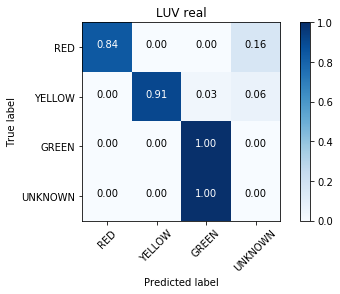

In [169]:
import numpy as np
from glob import glob
import os
import cv2

conf_matrix = np.zeros((4,4))

for img_fp in glob(os.path.join(real_red_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    img = adjust_histo(img)
    detected_state = int(detect_traffic_light_state3(img))
    conf_matrix[0][detected_state] = conf_matrix[0][detected_state]+1

for img_fp in glob(os.path.join(real_yellow_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    img = adjust_histo(img)
    detected_state = int(detect_traffic_light_state3(img))
    conf_matrix[1][detected_state] = conf_matrix[1][detected_state]+1

for img_fp in glob(os.path.join(real_green_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    img = adjust_histo(img)
    detected_state = int(detect_traffic_light_state3(img))
    conf_matrix[2][detected_state] = conf_matrix[2][detected_state]+1

for img_fp in glob(os.path.join(real_unknown_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    img = adjust_histo(img)
    detected_state = int(detect_traffic_light_state3(img))
    conf_matrix[3][detected_state] = conf_matrix[3][detected_state]+1
    
plt.figure()
plot_confusion_matrix(conf_matrix, classes=["RED", "YELLOW", "GREEN", "UNKNOWN"], normalize=True,
                      title='LUV real')

RED
YELLOW
GREEN
XXX 178
UNKNOWN
XXX 102
XXX 106
XXX 119
XXX 66
XXX 114
XXX 168
XXX 117
XXX 137
XXX 147
XXX 55
XXX 123
XXX 148
XXX 124
XXX 87
XXX 115
XXX 115
XXX 105
XXX 179
XXX 176
XXX 114
XXX 116
XXX 119
XXX 105
XXX 100
XXX 107
XXX 177
XXX 136
XXX 178
XXX 176
XXX 92
XXX 170
XXX 142
XXX 106
XXX 94
XXX 91
XXX 103
XXX 119
XXX 165
XXX 95
XXX 111
XXX 101
XXX 99
XXX 126
XXX 101
XXX 112
XXX 179
XXX 97
XXX 104
XXX 123
Normalized confusion matrix
[[0.96610169 0.         0.03389831 0.        ]
 [0.         0.66666667 0.         0.33333333]
 [0.         0.03409091 0.95454545 0.01136364]
 [0.25       0.04347826 0.33695652 0.36956522]]


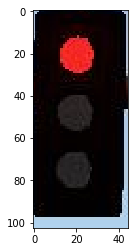

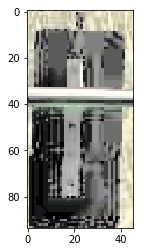

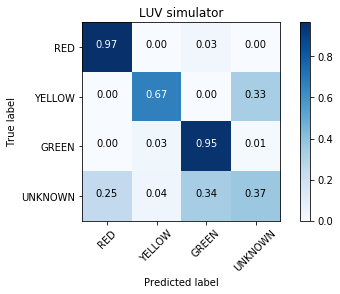

In [170]:
import numpy as np
from glob import glob
import os
import cv2

conf_matrix = np.zeros((4,4))

print("RED")
for img_fp in glob(os.path.join(sim_red_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    img = adjust_histo(img)
   
    detected_state = int(detect_traffic_light_state3(img))
    if detected_state != 0:
        plt.figure()
        plt.imshow(img)
    conf_matrix[0][detected_state] = conf_matrix[0][detected_state]+1

print("YELLOW")
for img_fp in glob(os.path.join(sim_yellow_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    img = adjust_histo(img)
    detected_state = int(detect_traffic_light_state3(img))
    conf_matrix[1][detected_state] = conf_matrix[1][detected_state]+1

print("GREEN")
for img_fp in glob(os.path.join(sim_green_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    img = adjust_histo(img)
    detected_state = int(detect_traffic_light_state3(img))
    conf_matrix[2][detected_state] = conf_matrix[2][detected_state]+1

print("UNKNOWN")
test = False
for img_fp in glob(os.path.join(sim_unknown_image, '*.png')):
    img = cv2.imread(img_fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)
    img = adjust_histo(img)
    if not test:
        plt.imshow(img)
        test = True
    detected_state = int(detect_traffic_light_state3(img))
    conf_matrix[3][detected_state] = conf_matrix[3][detected_state]+1
    
plt.figure()
plot_confusion_matrix(conf_matrix, classes=["RED", "YELLOW", "GREEN", "UNKNOWN"], normalize=True,
                      title='LUV simulator')